# Import packages and read the dataset

In [1]:
#Import packages 
import pylab
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
%matplotlib inline

#Read csv files
original_data = pd.read_csv('kc_house_data.csv')

#Print the original data set
print(original_data.head()) #We observe that our dataset has be cleaned for us
original_data.info()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Data cleaning 

In [2]:
#Convert dates variables into dates

#Drop unecessary strings after the date 
original_data.date = original_data.date.str[:8]

#Convert dates from our dataset
datetime_object = datetime.strptime('20141013', '%Y%m%d')
original_data.date = original_data.date.astype(int)
print(original_data.date)


#Convert dates from our dataset
yr_built_object = datetime.strptime('1955', '%Y')
original_data.yr_built = original_data.yr_built.astype(int)
print(original_data.yr_built)

#Convert dates from our dataset
yr_renovated_object = datetime.strptime('1991', '%Y')
original_data.yr_renovated = original_data.yr_renovated.astype(int)
print(original_data.yr_renovated)


0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
5        20140512
6        20140627
7        20150115
8        20150415
9        20150312
10       20150403
11       20140527
12       20140528
13       20141007
14       20150312
15       20150124
16       20140731
17       20140529
18       20141205
19       20150424
20       20140514
21       20140826
22       20140703
23       20140516
24       20141120
25       20141103
26       20140626
27       20141201
28       20140624
29       20150302
           ...   
21583    20140610
21584    20141202
21585    20140828
21586    20141015
21587    20150305
21588    20141113
21589    20140910
21590    20140514
21591    20141002
21592    20150416
21593    20150317
21594    20141017
21595    20141031
21596    20140813
21597    20150421
21598    20141013
21599    20140915
21600    20141015
21601    20150407
21602    20140626
21603    20140825
21604    20150126
21605    20141014
21606    20150326
21607    2

# Data exploration

                 id          date         price      bedrooms     bathrooms  \
count  2.161300e+04  2.161300e+04  2.161300e+04  21613.000000  21613.000000   
mean   4.580302e+09  2.014390e+07  5.400881e+05      3.370842      2.114757   
std    2.876566e+09  4.436582e+03  3.671272e+05      0.930062      0.770163   
min    1.000102e+06  2.014050e+07  7.500000e+04      0.000000      0.000000   
25%    2.123049e+09  2.014072e+07  3.219500e+05      3.000000      1.750000   
50%    3.904930e+09  2.014102e+07  4.500000e+05      3.000000      2.250000   
75%    7.308900e+09  2.015022e+07  6.450000e+05      4.000000      2.500000   
max    9.900000e+09  2.015053e+07  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989    

<Figure size 720x720 with 0 Axes>

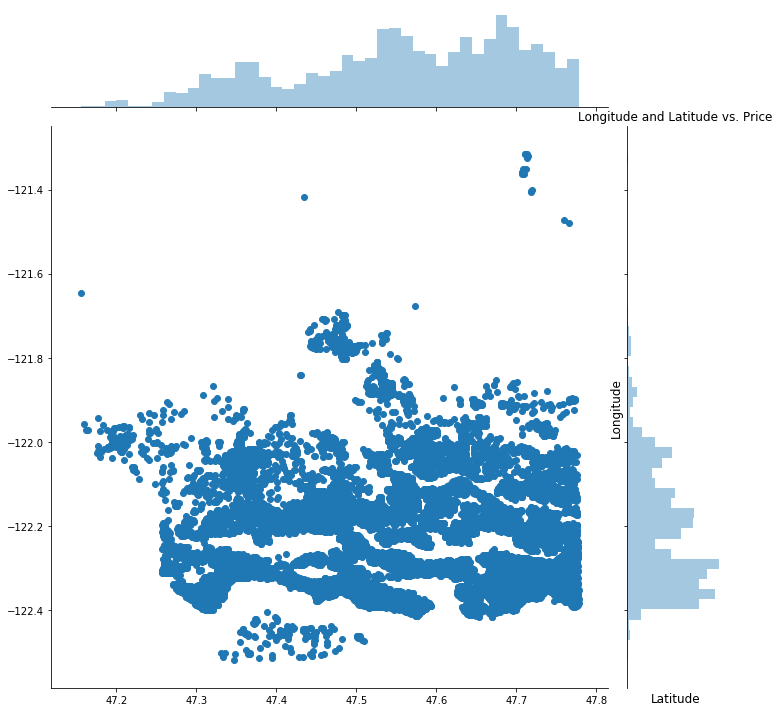

In [3]:
#Main parameters from data 
print(original_data.describe())

#Create a joint plot to map the concentration of houses in the given area
plt.figure(figsize = (10,10))
jointplot = sns.jointplot(x = original_data.lat.values, y = original_data.long.values, height = 10)
plt.title('Longitude and Latitude vs. Price')
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine
jointplot.savefig('Long and Lat vs. Price.png')

Text(0.5, 1.0, 'Price concentration per zipcode')

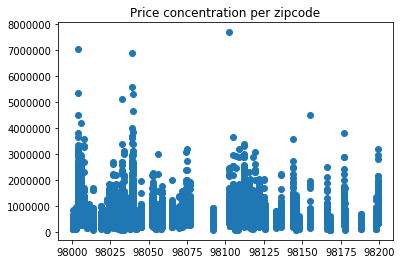

In [4]:
#Display the price zipcode
plt.scatter(original_data.zipcode, original_data.price)
plt.title("Price concentration per zipcode")

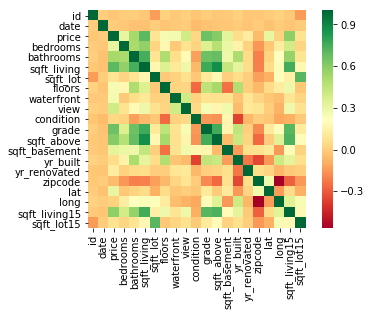

In [5]:
## SELECT FEATURES AND TARGET VALUES BASED ON CORRELATION ##

#Create a heatmap to identify relevant variables
heatmap = sns.heatmap(original_data.corr(), square=True, cmap='RdYlGn')
figure = heatmap.get_figure()    
figure.savefig('KC Variables heatmap.png', dpi=400)

# Check conditions of linearity

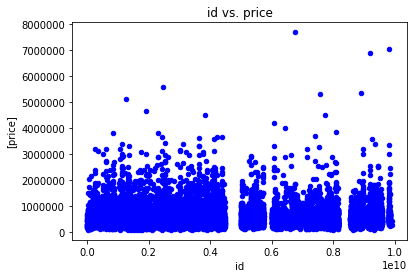

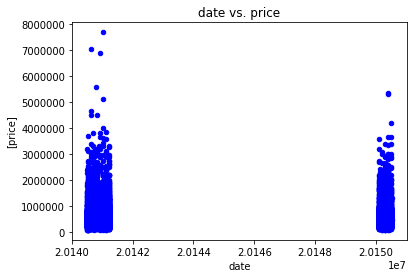

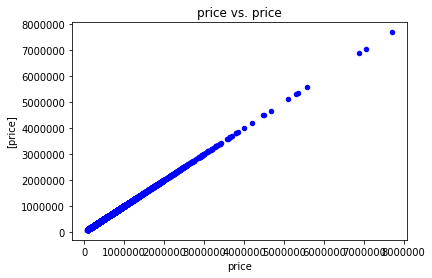

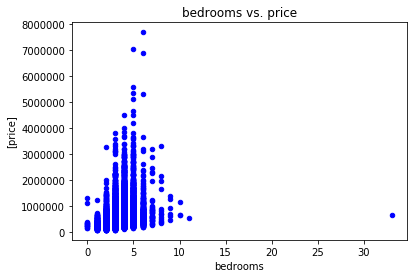

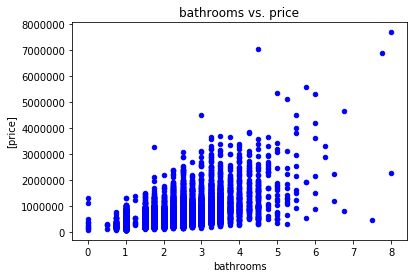

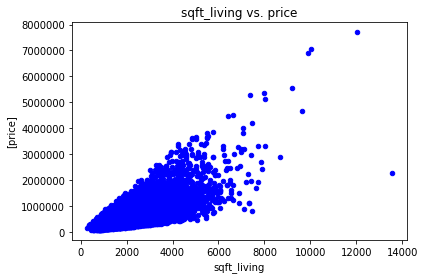

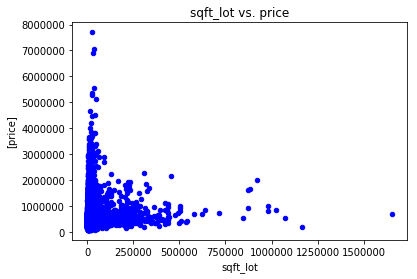

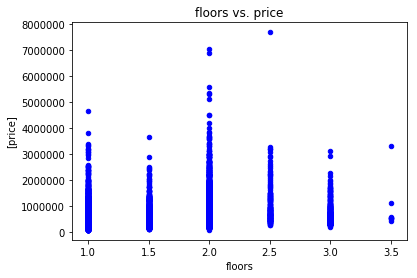

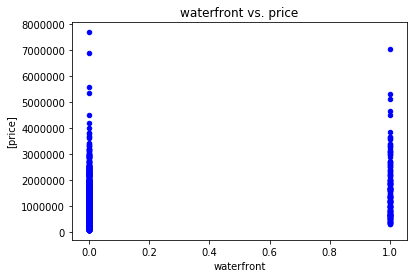

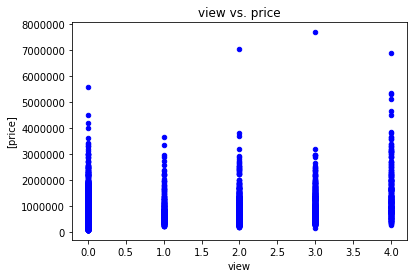

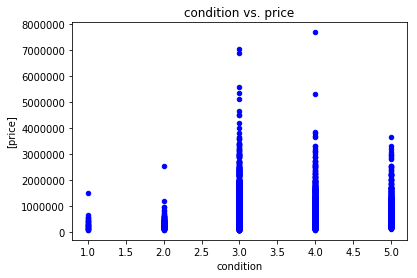

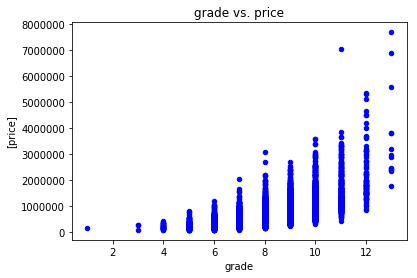

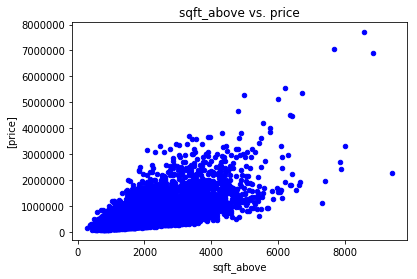

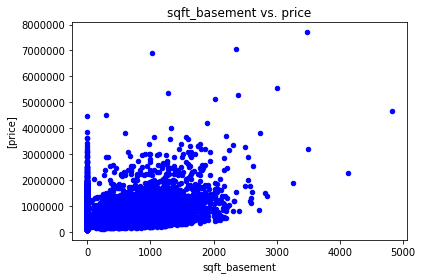

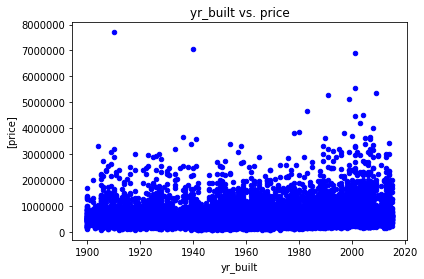

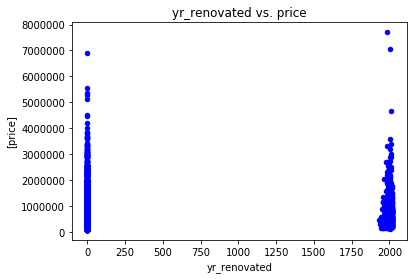

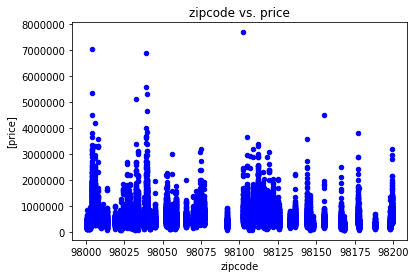

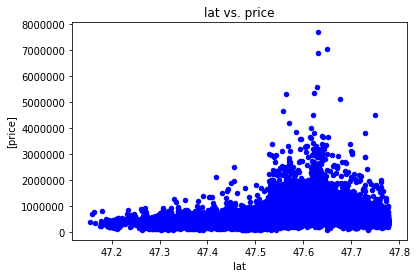

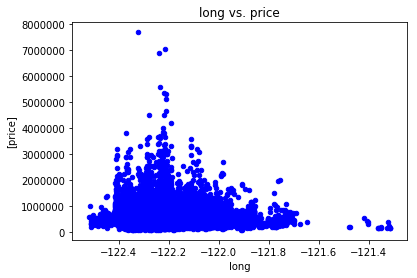

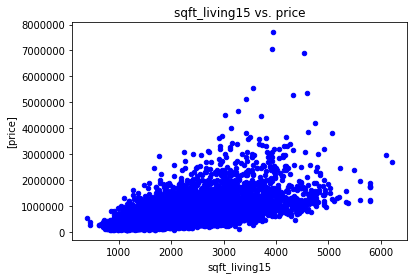

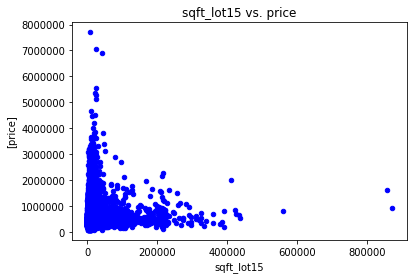

In [6]:
#Import packages
from numpy.polynomial.polynomial import polyfit

#Creating a for loop to create scatterplots of all variables against price
for i in original_data:
    original_data.plot.scatter(x = i,
                    y = ['price'], 
                    c = 'b')    

#labeling axis
    plt.title(i+' vs. price')    
    plt.savefig(i+'.png')
    
#see Footnote 4 for an explanation of the code above
    plt.show()


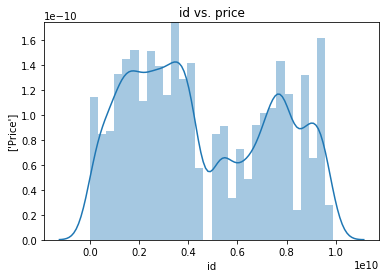

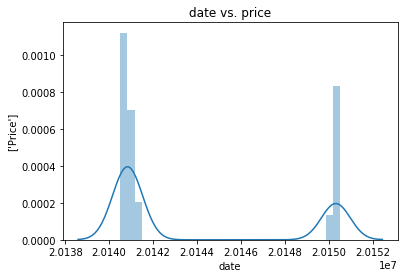

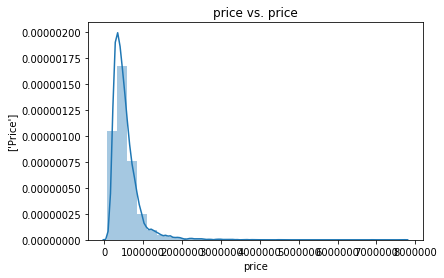

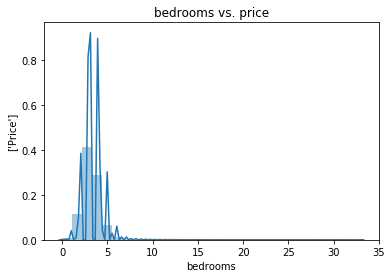

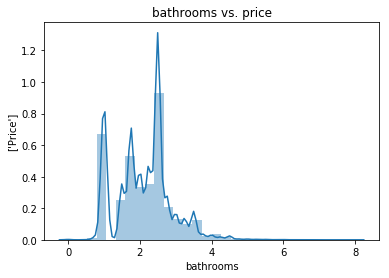

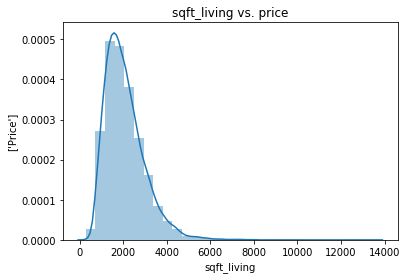

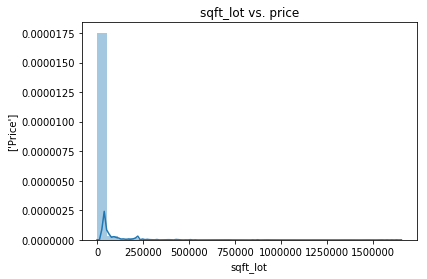

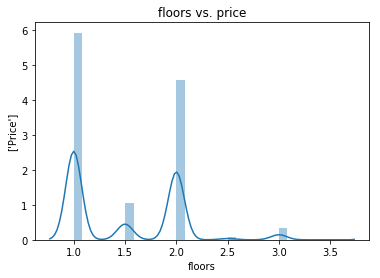

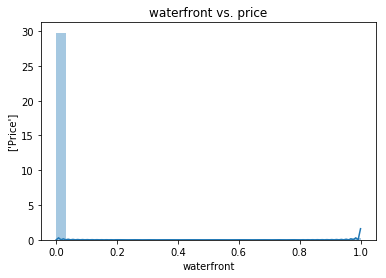

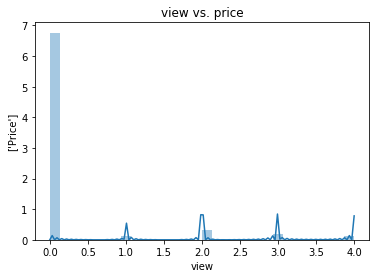

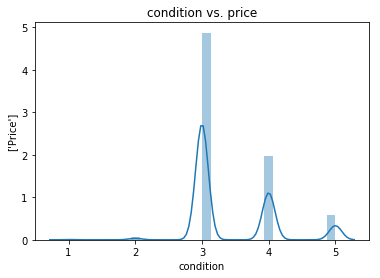

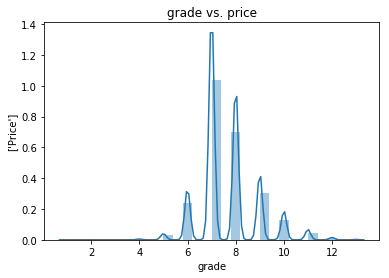

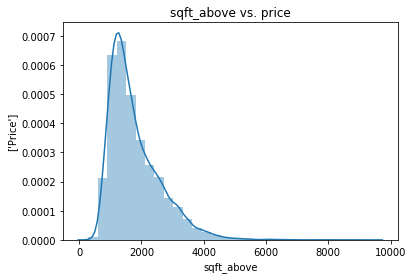

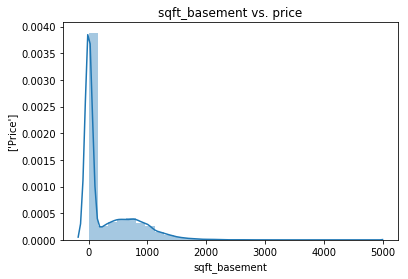

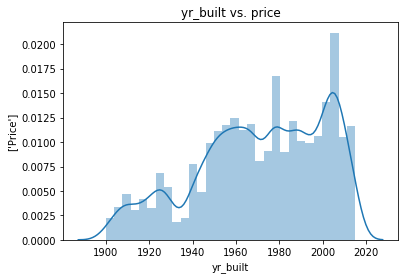

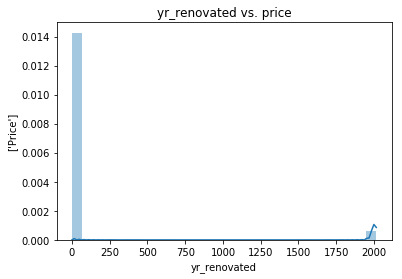

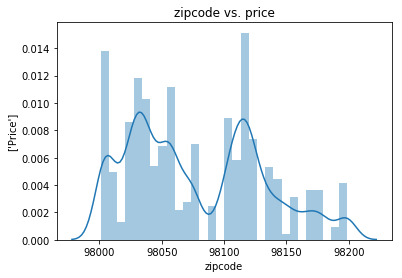

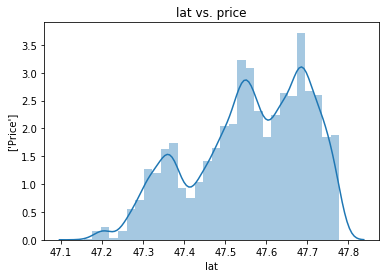

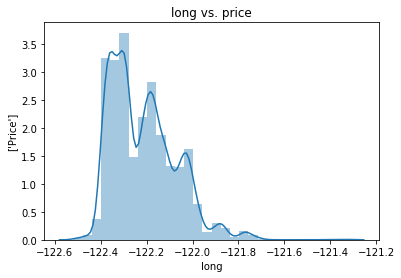

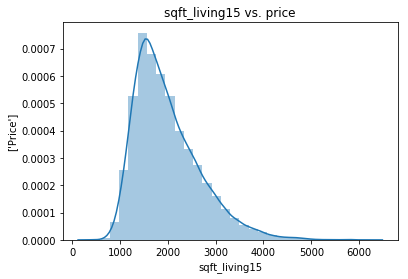

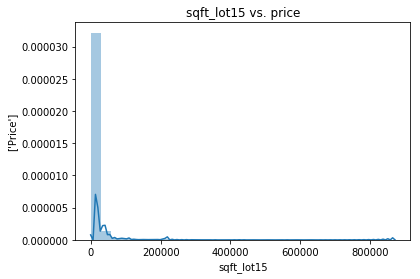

In [7]:
#Creating a for loop to create distplot of all variables against price
for i in original_data:
    sns.distplot(original_data[i],
             bins = 30)

# labeling axis
    plt.xlabel(i)
    plt.ylabel(['Price'])
    
#Title
    plt.title(i+' vs. price')
    
    plt.savefig(i+'Distplot.png')

# see Footnote 4 for an explanation of the code above
    plt.show()


In [8]:
#Create a new DataFrame with selected feature values
data = pd.DataFrame(original_data, columns=['date','price', 'bedrooms','bathrooms', 'sqft_living','sqft_living15', 'sqft_above', 'sqft_basement', 'waterfront', 'grade', 'zipcode', 'condition','view', 'lat', 'long', 'floors','sqft_lot', 'sqft_lot15', 'yr_built', 'yr_renovated']) 
"""Here again no need to use one-hot encoder for categorical values (i.e. view) since our dataset has been formatted already."""

#Display your data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_above,sqft_basement,waterfront,grade,zipcode,condition,view,lat,long,floors,sqft_lot,sqft_lot15,yr_built,yr_renovated
0,20141013,221900.0,3,1.00,1180,1340,1180,0,0,7,98178,3,0,47.5112,-122.257,1.0,5650,5650,1955,0
1,20141209,538000.0,3,2.25,2570,1690,2170,400,0,7,98125,3,0,47.7210,-122.319,2.0,7242,7639,1951,1991
2,20150225,180000.0,2,1.00,770,2720,770,0,0,6,98028,3,0,47.7379,-122.233,1.0,10000,8062,1933,0
3,20141209,604000.0,4,3.00,1960,1360,1050,910,0,7,98136,5,0,47.5208,-122.393,1.0,5000,5000,1965,0
4,20150218,510000.0,3,2.00,1680,1800,1680,0,0,8,98074,3,0,47.6168,-122.045,1.0,8080,7503,1987,0


In [9]:
#Inspect the shape of our data before dropping missing values
data.shape

(21613, 20)

In [10]:
## CREATE FEATURE AND TARGET VALUES ## 

#Create an array for independent variables (bedrooms, bathroom, sqft_living, grade) and dependent variables (price)
prices = data['price'].values
all_features = data.drop('price', axis=1).values


#Inspect the shape of our data
print("King County housing dataset has {} data points with {} variables each.".format(*data.shape))

King County housing dataset has 21613 data points with 20 variables each.


# Data exploration of our dataset with variables

In [11]:
#Minimum price of prices
minimum_price = np.amin(prices)

#Maximum price from prices
maximum_price = np.amax(prices)

#Mean of the prices 
mean_price = np.mean(prices)

#Median of the prices 
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for King County housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for King County housing dataset:

Minimum price: $75000.0
Maximum price: $7700000.0
Mean price: $540088.1417665294
Median price $450000.0
Standard deviation of prices: $367118.7031813723


In [12]:
## TRAIN TEST SPLIT OUR DATA ##

#Split the data into our training and testing set
X_train, X_test, y_train, y_test = train_test_split(all_features, prices, test_size=0.3, random_state=42)

print('The training and test were successfully splited and created.')

The training and test were successfully splited and created.


In [13]:
## FITTING A REGRESSION MODEL ## 

#Create and fit regression model: reg
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

#Compute prediction y_pred
y_pred = reg.predict(X_test)
print(y_pred.round(2))
print(y_test)

[ 450074.37  741255.82 1233036.33 ...  368228.41  805408.46  572522.65]
[ 365000.  865000. 1038000. ...  410500.  940000.  410000.]


In [14]:
#Compute my R^2 and RMSE

print("R^2: {}".format(reg.score(X_test, y_test).round(4)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7009
Root Mean Squared Error: 207813.59


In [15]:
#Validate our model with the 5-fold cross validation score

#cv_score = cross_val_score(reg, all_features, prices, cv=5).round(2)
#print(cv_score)
#print("Average 5-Fold CV Score: {}".format(np.mean(cv_score).round(2)))

In [16]:
#Use Gradient boosting to improve the prediction of our model
from sklearn import ensemble
gradient_boosting = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

#Fit of the model
gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
#Display scores achieved with gradient boosting
gradient_boosting.score(X_test,y_test)

0.8808391207503116

In [18]:
#Validate our model with the 5-fold cross validation score

cv_score = cross_val_score(gradient_boosting, all_features, prices, cv=5).round(2)
print(cv_score)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_score).round(2)))

[0.9  0.9  0.9  0.9  0.89]
Average 5-Fold CV Score: 0.9
